In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.ops import rnn, rnn_cell
mnist = input_data.read_data_sets("E:\\Course\\data\\", one_hot = True)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\Admin\Anaconda2\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting E:\Course\data\train-images-idx3-ubyte.gz
Extracting E:\Course\data\train-labels-idx1-ubyte.gz
Extracting E:\Course\data\t10k-images-idx3-ubyte.gz
Extracting E:\Course\data\t10k-labels-idx1-ubyte.gz


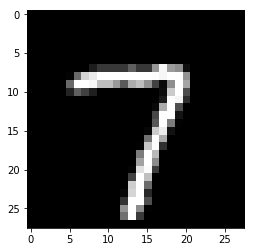

In [2]:
image = mnist.train.images[100]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [3]:
hm_epochs = 10
n_classes = 10
batch_size = 128
chunk_size = 28
n_chunks = 28
rnn_size = 128


x = tf.placeholder('float', [None, n_chunks,chunk_size])
y = tf.placeholder('float')

def recurrent_neural_network(x):
    layer = {'weights':tf.Variable(tf.random_normal([rnn_size,n_classes])),
             'biases':tf.Variable(tf.random_normal([n_classes]))}

    x = tf.transpose(x, [1,0,2])
    x = tf.reshape(x, [-1, chunk_size])
    x = tf.split(x, n_chunks, 0)

    lstm_cell = rnn_cell.BasicLSTMCell(rnn_size,state_is_tuple=True,reuse=tf.AUTO_REUSE)
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    output = tf.matmul(outputs[-1],layer['weights']) + layer['biases']

    return output

In [4]:
def train_neural_network(x):
    prediction = recurrent_neural_network(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                epoch_x = epoch_x.reshape((batch_size,n_chunks,chunk_size))

                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:mnist.test.images.reshape((-1, n_chunks, chunk_size)), y:mnist.test.labels}))

train_neural_network(x)

Epoch 0 completed out of 10 loss: 198.8493653871119
Epoch 1 completed out of 10 loss: 57.66047190874815
Epoch 2 completed out of 10 loss: 39.49227416329086
Epoch 3 completed out of 10 loss: 30.044734817929566
Epoch 4 completed out of 10 loss: 24.743122766260058
Epoch 5 completed out of 10 loss: 20.480872318847105
Epoch 6 completed out of 10 loss: 17.43237386131659
Epoch 7 completed out of 10 loss: 15.122205289080739
Epoch 8 completed out of 10 loss: 15.429663821822032
Epoch 9 completed out of 10 loss: 11.630479897838086
Accuracy: 0.9821
